In [2]:
"""***************************** 15h April'23 Assignment *****************************"""

"***************************** 15h April'23 Assignment *****************************"

# Ensemble Techniques And Its Types-5

#### Q1. You are working on machine learning project where you have containing numerical and categorical features. You have identified that some features are highly correlated and there are missing values in some of the columns. You want to build a pipeline that automates feature engineering process and handles missing values.

***Design a Pipeline that includes following steps:***
- Use an automated method to identify important features of dataset
- Use a numerical pipeline that includes following steps:
- Impute missing values in numeric columns with mean
- Scale the numerical columns using standardisation
- Create a categorical pipeline that includes following steps:
- Impute missing values in categorical columns with most frequent data
- One Hot Encode the categorical columns
- Combine the numerical and categorical pipelines using a ColumnTransformer
- Use Random Forest Classifier to build final model
- Evaluate accuracy of model on the test dataset

Note : Your Solution should include code snippets for each step of pipeline and a brief explaination of each step. You should also provide an interpretation of results and suggest possible improvements for pipeline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
X = df.drop(labels='Outcome',axis=1)
y = df[['Outcome']]
X.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
767,1,93,70,31,0,30.4,0.315,23


In [15]:
y[0:5]

,Outcome
0,1
1,0
2,1
3,0
4,1


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)
X_train.shape

(537, 8)

In [24]:
X_test.shape

(231, 8)

In [26]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [31]:
features = list[df.columns]
features

list[Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')]

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                      ('scaler',StandardScaler())])

In [33]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([('pipe',pipe,features)])

In [36]:
X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [37]:
preprocessor.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('pipe',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 list[Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')])])>

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_cls = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=42)
random_cls.fit(X_train_transformed,y_train)

/tmp/ipykernel_102/422273009.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_cls.fit(X_train_transformed,y_train)


RandomForestClassifier(max_depth=4, random_state=42)

##### Hyperparameeter

In [57]:

from warnings import filterwarnings
filterwarnings('ignore')
parameters = {
    'n_estimators':[10,1,100,0.1,0.001],
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,10,15]
}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=3,
                                  scoring='accuracy',verbose=2)

In [59]:
random_search.fit(X_train_transformed,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .max_depth=6, min_samples_leaf=15, n_estimators=100; total time=   0.2s
[CV] END .max_depth=6, min_samples_leaf=15, n_estimators=100; total time=   0.2s
[CV] END .max_depth=6, min_samples_leaf=15, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=10, min_samples_leaf=6, n_estimators=1; total time=   0.0s
[CV] END ...max_depth=10, min_samples_leaf=6, n_estimators=1; total time=   0.0s
[CV] END ...max_depth=10, min_samples_leaf=6, n_estimators=1; total time=   0.0s
[CV] END ..max_depth=10, min_samples_leaf=15, n_estimators=1; total time=   0.0s
[CV] END ..max_depth=10, min_samples_leaf=15, n_estimators=1; total time=   0.0s
[CV] END ..max_depth=10, min_samples_leaf=15, n_estimators=1; total time=   0.0s
[CV] END ...max_depth=2, min_samples_leaf=10, n_estimators=1; total time=   0.0s
[CV] END ...max_depth=2, min_samples_leaf=10, n_estimators=1; total time=   0.0s
[CV] END ...max_depth=2, min_samples_leaf=10, n_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [2, 4, 6, 10, 15],
                                        'n_estimators': [10, 1, 100, 0.1,
                                                         0.001]},
                   scoring='accuracy', verbose=2)

In [60]:
random_search.best_params_

{'n_estimators': 100, 'min_samples_leaf': 15, 'max_depth': 6}

In [62]:
random_search.best_score_

0.7653631284916201

In [64]:
best = random_search.best_estimator_
best

RandomForestClassifier(max_depth=6, min_samples_leaf=15)

In [66]:
y_pred = best.predict(X_test_transformed)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

<AxesSubplot: >

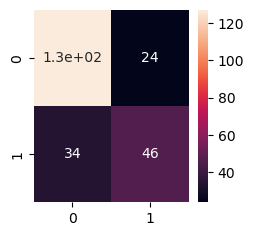

In [69]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2.5,2.5))
sns.heatmap(mat,annot=True)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       151
           1       0.66      0.57      0.61        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



#### Q2. Build a pipeline that includes random forest classifier and a logistic regression classifier , and then voting classifier to combine their predictions. Train the pipeline on iris dataset and evaluate its accuracy

### Iris dataset

In [93]:
from sklearn.datasets import load_iris
load_iris

<function sklearn.datasets._base.load_iris(*, return_X_y=False, as_frame=False)>

In [94]:
x,Y = load_iris(return_X_y=True)

In [95]:
x.shape

(150, 4)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,random_state=42,test_size=0.35)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit(x_test)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

In [104]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=4)
lr = LogisticRegression(C=1.0)

vc = VotingClassifier(estimators=[('rfc',rfc),
                                  ('lr',lr)],
                                  voting='soft')

In [105]:
vc.fit(x_train,Y_train)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(max_depth=4)),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [116]:
y_pred1 = vc.predict(x)
y_pred1

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test,y_pred1)
sns.heatmap(cf,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred1))